<div style="text-align: center; font-size:30px; font-weight: bold;">
    Fraud Detection in NYC Taxi Services: A Data Science Approach Using TLC Trip Data (January 2023)
</div>



<div style="text-align: center; font-size:20px; font-weight: bold;">
    MOH. KHISANUL FAKHRUDIN AKBAR (JCDS 0512)
</div>


---

# Background

New York City Taxi and Limousine Commission (NYC TLC) adalah lembaga pemerintah yang dibentuk pada tahun 1971 dengan tujuan untuk mengatur dan mengawasi layanan transportasi berlisensi yang bersifat komersial seperti taksi, limusin, kendaraan sewa, dan aplikasi ride-hailing (seperti Uber dan Lyft) di New York City. NYC TLC bertanggung jawab untuk memastikan keselamatan, keadilan, dan kepatuhan bagi pengguna dan penyedia jasa transportasi yang beroperasi sesuai dengan peraturan yang ketat. Untuk memastikan operasional taksi berjalan dengan baik serta memenuhi kebutuhan regulasi, New York City Taxi and Limousine Commission (NYC TLC) mengelola sistem pencatatan perjalanan taksi secara terstruktur melalui pihak ke tiga atau vendor teknologi resmi (yang telah disertifikasi). Setiap perjalanan yang dilakukan oleh taksi di NYC dikumpulkan dalam database yang disebut NYC TLC Trip Record. 

Dalam industri transportasi berbasis taksi, kecurangan (fraud) dapat menyebabkan kerugian finansial yang signifikan bagi penyedia layanan dan pelanggan. Berdasarkan data perjalanan taksi NYC, kita akan melihat apakah ada indikasi bahwa beberapa perjalanan mungkin tidak valid atau menyimpang dari pola normal. Oleh karena itu, diperlukan analisis mendalam untuk mendeteksi kemungkinan adanya kecurangan.

## Problem statment

Dalam industri transportasi berbasis taksi, kecurangan (fraud) dapat menyebabkan kerugian finansial yang signifikan bagi penyedia layanan dan pelanggan. Berdasarkan data perjalanan taksi NYC, ada indikasi bahwa beberapa transaksi dan perjalanan mungkin tidak valid atau menyimpang dari pola normal. Oleh karena itu, diperlukan analisis mendalam untuk mendeteksi kemungkinan adanya kecurangan dalam sistem.

Permasalahan utama yang ingin diselesaikan:

1. Mendeteksi perjalanan mencurigakan
    * Abnormalitas pada jarak perjalanan, apakah ada perjalanan dengan jarak yang tidak masuk akal?
    * Abnormalitas pada durasi perjalanan, apakah ada perjalanan yang berlangsung terlalu lama untuk jarak pendek atau terlalu cepat untuk jarak jauh?
    * Abnormalitas pada tarif perjanalan, apakah ada perjalanan yang kategori tarifnya tidak sesuai?
1. Pola Abnormalitas
    * Mengetahui daerah mana saja yang sering terjadinya abnormalitas perjalanan
    * Mengetahui pada waktu-waktu tertentu yang sering terjadinya abnormalitas perjalanan

Setelah berhasil mengetahui abnormalitas perjalanan, daerah dan waktu yang frekuensi abnormalitasnya tinggi kita sebagai data analyst di NYC TLC dapat memberikan rekomendasi atau solusi agar kedepanya tidak terjadi lagi dan menghindari kerugian diberbagai pihak.

# Data

## Data Understanding and Cleaning

Dataset in merupakan data perjalanan taksi yang dikumpulkan oleh vendor atau perusahaan teknologi yang telah mendapat izin resmi melalui program TPEP/LPEP seperti yang tertera pada kolom `VendorID`, kemudian diserahkan kepada Komisi Taksi dan Limusin Kota New York (TLC). Meskipun data ini dipublikasikan oleh TLC, mereka bukanlah pihak yang secara langsung mengoperasikan perangkat atau mengumpulkan data dari tiap taksi, melainkan hanya menerima data dari vendor secara berkala dan otomatis. Oleh karena itu, TLC tidak dapat menjamin bahwa data yang disediakan benar-benar akurat atau bebas dari kesalahan, karena data tersebut sepenuhnya bergantung pada laporan yang diberikan oleh pihak ketiga. Kita dapat menggunakan data set NYC TLC Trip record yang dapat di unduh [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Dataset ini memuat berbagai informasi penting seperti waktu dan lokasi penjemputan serta pengantaran, jumlah penumpang, jarak perjalanan, tarif, metode pembayaran, serta status perjalanan. Ada 20 kolom pada dataset ini yaitu:
 * `VendorID` → Kode vendor penyedia data
 * `lpep_pickup_datetime` → Waktu penumpang naik (meter menyala).
 * `lpep_dropoff_datetime` → Waktu penumpang turun (meter mati).
 * `Passenger_count` → Jumlah penumpang.
 * `Trip_distance` → Jarak perjalanan dalam mil.
 * `PULocationID` → ID zona taksi tempat penumpang naik.
 * `DOLocationID` → ID zona taksi tempat penumpang turun.
 * `RateCodeID` → Kode tarif yang berlaku.
 * `Store_and_fwd_flag` → Indikator apakah data perjalanan disimpan di memori sebelum dikirim ke server.
 * `Payment_type` → Metode pembayaran
 * `Fare_amount` → Tarif berdasarkan waktu dan jarak.
 * `extra` → Biaya tambahan.
 * `MTA_tax` → Pajak MTA ($0.50).
 * `Improvement_surcharge` → Pajak tambahan per perjalanan ($0.30).
 * `Tip_amount` → Tips (hanya untuk pembayaran kartu kredit).
 * `Tolls_amount` → Total biaya tol dalam perjalanan.
 * `ehail_fee` → Total biaya aplikasi ehail.
 * `Total_amount` → Total biaya perjalanan (tidak termasuk tips tunai).
 * `Trip_type` → Kode jenis perjalanan.
 * `Congestion_surcharge` → adalah biaya tambahan untuk mengurangi kemacetan

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu kriteria abnormalitas apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning.

In [64]:
# import libary yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, ttest_ind

Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record:

In [65]:
df =  pd.read_csv("../data/NYC TLC Trip Record.csv", low_memory=False)
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [66]:
print(f"Dataset ini memiliki jumlah baris: {df.shape[0]}, dan jumlah kolom: {df.shape[1]}")
df.info()

Dataset ini memiliki jumlah baris: 68211, dan jumlah kolom: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  floa

In [67]:
print("Jumlah baris kosong disetiap kolom:")
missing_value = df.isnull().sum()
# missing_value = missing_value[missing_value>0]
missing_value

Jumlah baris kosong disetiap kolom:


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [68]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [69]:
pd.reset_option('display.max_colwidth')
# pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'type', 'null' , 'Number of Unique', 'Unique Sample'], data=listItem)
tabel1Desc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,4324,2,"[N, Y, nan]"
4,RatecodeID,float64,4324,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,4324,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Insight:
* Dataset ini memiliki `20 kolom` dan jumlah baris sebanyak `68211 baris`.
* Dataset ini memiliki nilai kosong yang diwakili dengan nan dan tersebar pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`.
* Pada kolom `ehail_fee` berisi data kosong sehingga memuat data nan sebanyak 68211 baris.
* Pada kolom `RatecodeID` normalnya berisi data dalam rentang 1-6, namun ada data yang memiliki nilai 99 (diluar kategori).
* Pada `lpep_pickup_datetime` dan `lpep_dropoff_datetime` seharusnya memiliki tipe data datetime bukan string.
* Dataset ini menggunakan kode lokasi (Location ID) untuk mendefinisikan tempat, kita bisa tambahkan kolom baru berisi lokasi asli berdasarkan Location ID yang berasal dari luar Dataset utama (opsional)

### Missing Value

In [70]:
# persentase missing value di tiap kolom
missing_value = missing_value[missing_value>0]
display(missing_value.to_frame(name="Jumlah baris kosong"), (missing_value/df.shape[0]*100).to_frame(name="Persentase"))

,Jumlah baris kosong
store_and_fwd_flag,4324
RatecodeID,4324
passenger_count,4324
ehail_fee,68211
payment_type,4324
trip_type,4334
congestion_surcharge,4324


,Persentase
store_and_fwd_flag,6.339154
RatecodeID,6.339154
passenger_count,6.339154
ehail_fee,100.000000
payment_type,6.339154
trip_type,6.353814
congestion_surcharge,6.339154


Secara garis besar dari kedua tabel diatas dapat disimpulkan bahwa kebanyakan data kosong memiliki jumlah baris dan persentase yang sama yaitu sekitar 6.3%, kecuali kolom `ehail_fee` yang sepenuhnya memiliki data kosong

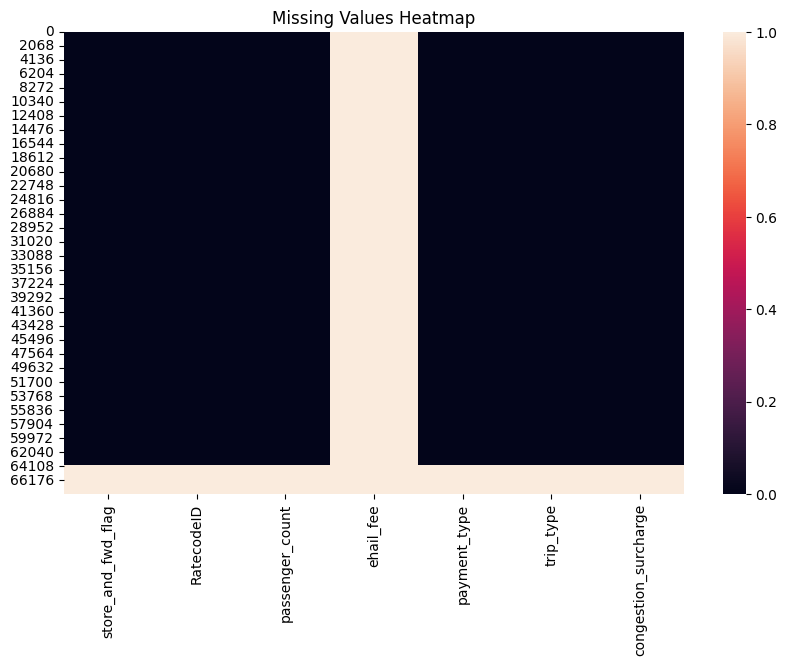

In [71]:
plt.figure(figsize=(10, 6))  # Ukuran grafik lebih proporsional
sns.heatmap(df[missing_value.index].isna())

plt.title("Missing Values Heatmap")
plt.show()

Insight:
* `ehail_fee` adalah biaya tambahan yang dikenakan untuk perjalanan yang dipesan melalui layanan e-hailing (misalnya Uber, Lyft, atau aplikasi pemesanan taksi lainnya)
* Pada kolom `ehail_fee` 100% data berisi null sehingga seluruh grafiknya putih. Dataset ini mencakup perjalanan taksi biasa (bukan e-hailing) oleh karena itu kolom `ehail_fee` memang sengaja kosong sehingga dapat dikatakan **Missing Not at Random (MNAR)**
* kolom `store_and_fwd_flag` memuat informasi status apakah taksi menyimpan data perjalanan sebelum mengirimnya ke server, jika data ini kosong berarti terdapat kesalahan dalam proses pencatatan atau pengolahan data, akibatnya informasi tertentu (misalnya `RatecodeID`, `passenger_count`, `payment_type`) bisa hilang dan tidak tercatat di database.
* Jika kita lihat pada visualisasi persebaran nilai kosong dapat diketahui bahwa data yang kosong pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` memiliki posisi yang sama atau pada baris yang sama. kita bisa berasumsi bahwa jenis missing value pada dataset ini adalah **MAR (Missing at Random)** karena nilai yang hilang dikarena kesalahan teknis dan data hilang bukan secara acak, tetapi karena faktor tertentu yaitu data pada kolom `store_and_fwd_flag` yang hilang.

In [72]:
df[df["store_and_fwd_flag"].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


#### Solution 

`ehail_fee` adalah biaya tambahan yang dikenakan untuk perjalanan yang dipesan melalui layanan e-hailing (misalnya Uber, Lyft, atau aplikasi pemesanan taksi lainnya). Pada kolom `ehail_fee` 100% data berisi null yang berarti dalam dataset ini tidak ada yang menggunakan layanan e-hailing, dikarenakan kolom berisi data kosong maka sebaiknya kita drop saja.

In [73]:
# Hapus kolon ehail_fee
df.drop(columns="ehail_fee", inplace=True)

Seperti yang sudah dijelaskan diatas bahwa nilai kosong pada `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` disebabkan oleh kesalahan dalam proses pencatatan atau pengolahan data pada `store_and_fwd_flag` sehingga nilai kosongnya tepat pada baris yang sama dan memiliki persentase nilai kosong sebesar 6.3%, maka kita bisa hapus baris tersebut.

In [74]:
# Hapus baris yang memiliki posisi kosong yang sama
df = df.drop(df[df["store_and_fwd_flag"].isnull()].index)

Setelah kita menangani missing value selanjutnya kita cek lagi apakah masih ada missing valuenya

In [75]:
# cek lagi nilai kosong
df.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

In [76]:
df[df["trip_type"].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


In [77]:
# Mengecek nilai 'trip_type' untuk baris yang memiliki RatecodeID = 99
trip_type_for_99 = df[df["trip_type"].isnull()][["RatecodeID", "trip_type"]]
trip_type_for_99

,RatecodeID,trip_type
1084,99.0,NaN
2174,99.0,NaN
9055,99.0,NaN
14125,99.0,NaN
29143,99.0,NaN
29711,99.0,NaN
35975,99.0,NaN
37691,99.0,NaN
42432,99.0,NaN
45204,99.0,NaN


Dapat diketahu masih ada 10 baris pada kolom `trip_type` yang memiliki nilai kosong, pada baris tersebut bersamaan memiliki nilai 99 pada `RatecodeID` yang merupakan abnormalitas juga

Dalam aturan resmi NYC Taxi & Limousine Commission (TLC), RatecodeID hanya memiliki 6 nilai valid:
1. Standard Rate
1. JFK Airport
1. Newark Airport
1. Nassau or Westchester
1. Negotiated Fare
1. Group Ride

* Namun, pada baris ini ada 10 perjalanan dengan `RatecodeID` = 99 yang tidak termasuk dalam kategori resmi, dan memiliki `trip_type` = Nan. Artinya, data ini kemungkinan berasal dari kesalahan input.
* Kombinasi `RatecodeID` = 99 dan `trip_type` = NaN menunjukkan bahwa baris ini adalah data error atau tidak valid, dikarenakan jumlah abnormalitas ini hanya 10 baris (0.01% dari 68,211) lebih baik kita hapus saja.

In [78]:
df = df.drop(df[df["trip_type"].isnull()].index)
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### Casting

Setelah kita menangani missing value selanjutnya kita menangani kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang seharusnya memiliki tipe data berupa datetime namum pada dataset memiliki tipe string/object

In [79]:
# Ubah tipe data kolom menjadi datetime
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [80]:
pd.reset_option('display.max_colwidth')
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

NewDesc = pd.DataFrame(columns=['Column Name', 'type','null', 'Number of Unique', 'Unique Sample'], data=listItem)
NewDesc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62665,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0,62602,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,463,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


### Add Aditional Data

Sebagai pelengkap mari kita tambahkan kolom `Borough` dan `Zone` berdasarkan LocationID agar mudah dibaca. data tambahan ini bersumber dari luar dataset yang dapat diunduh [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [81]:
df_zone =  pd.read_csv("../data/taxi-zone-lookup.csv")
df_zone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


Menambahkan Lokasi Penumpang Naik

In [82]:
df = df.merge(df_zone, left_on="PULocationID", right_on="LocationID", how="left")
df = df.drop(columns="LocationID")
df.rename(columns={"Borough": "Pickup Borough", "Zone":"Pickup Zone"},inplace=True)

Menambahkan Lokasi Penumpang Turun

In [83]:
df = df.merge(df_zone, left_on="DOLocationID", right_on="LocationID", how="left")
df = df.drop(columns="LocationID")
df.rename(columns={"Borough": "Drop Borough", "Zone":"Drop Zone"},inplace=True)

Setelah data bersih dan ditambahkan keterangan lokasi naik dan turun penumpang, kita akan menambahkan durasi perjalanan:

In [84]:
df["Trip Duration"] = df["lpep_dropoff_datetime"]-df["lpep_pickup_datetime"]

In [85]:
# Ekstraksi informasi waktu
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

In [86]:
df["Trip Duration (seconds)"] = df["Trip Duration"].dt.total_seconds()

### Focusing the data

In [87]:
data_per_year = df.groupby(df['lpep_pickup_datetime'].dt.year).size()
data_per_year

lpep_pickup_datetime
2009        1
2022        2
2023    63874
dtype: int64

In [88]:
df_2023 = df[df['lpep_pickup_datetime'].dt.year == 2023].copy()
df_2023['lpep_pickup_datetime'].dt.month.value_counts()

lpep_pickup_datetime
1    63873
2        1
Name: count, dtype: int64

In [89]:
df = df[(df['lpep_pickup_datetime'].dt.year == 2023) & (df['lpep_pickup_datetime'].dt.month == 1)]

Pada awalnya Dataaset ini memiliki rentang waktu antara tahun 2009 hingga 2023, namun setelah kita analisis ternyata kebanyakan datanya berada pada bulan **Januari pada tahun 2023**, oleh karena itu kita akan menggunakan periode tersebut sebagai rentang waktu analisis kita.

In [90]:
df["Pickup Borough"].value_counts()

Pickup Borough
Manhattan        37474
Queens           17258
Brooklyn          8013
Bronx              915
Unknown            200
Staten Island       12
EWR                  1
Name: count, dtype: int64

In [91]:
df[df["Pickup Borough"]=="Unknown"]["PULocationID"].value_counts()

PULocationID
264    135
265     65
Name: count, dtype: int64

In [92]:
df.drop(df[(df["PULocationID"].isin([264,265])) | (df["DOLocationID"].isin([264,265])) ].index, inplace=True)

In [93]:
df["Pickup Borough"].value_counts()

Pickup Borough
Manhattan        37352
Queens           17018
Brooklyn          7915
Bronx              885
Staten Island       12
Name: count, dtype: int64

Pada database [NYC TLC Taxi Zone](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) LocationID = 264 & 265 memang tercatat sebagai wilayah yang tidak dikenal. Data mentah yang diambil dari perangkat GPS atau pihak ke tiga terkadang mengalami kesalahan pencatatan, sehingga zona tertentu bisa tampil sebagai *Unknown* meskipun sebenarnya adalah area yang valid. Oleh karena itu, kita akan menghapus perjalanan yang memiliki LocationID = 264 & 265.

### Cleaned Data

Sebelum dibersihkan, kita memiliki 68211 baris dan 20 kolom, sekarang kita memiliki **63182 baris**, Sekitar 5029 (7.3%) baris data yang kosong dihapus dan **32 kolom** setelah ada penambahan kolom baru untuk memuat lokasi yaitu `Drop Borough`,`Drop Zone`, `Pickup Borough`, `Pickup Zone` dan Durasi perjalanan `Trip Duration`. <br>
sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan:

In [94]:
pd.reset_option('display.max_colwidth')
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

NewDesc = pd.DataFrame(columns=['Column Name', 'type','null', 'Number of Unique', 'Unique Sample'], data=listItem)
NewDesc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62001,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0,61932,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
5,PULocationID,int64,0,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 8.0, 7.0, ..."
8,trip_distance,float64,0,1656,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,421,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


In [95]:
display(df.describe(), df.describe(include='object'))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration,hour,Trip Duration (seconds)
count,63182.000000,63182,63182,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,...,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182,63182.000000,63182.000000
mean,1.856636,2023-01-16 22:35:53.204805120,2023-01-16 22:53:47.502912256,1.083821,97.097559,137.055332,1.317068,2.551953,15.867033,0.886131,...,2.035943,0.139344,0.949932,20.998198,1.373192,1.018138,0.734335,0 days 00:17:54.298107055,13.921291,1074.298107
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,...,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0 days 00:00:00,0.000000,0.000000
25%,2.000000,2023-01-09 12:36:07.249999872,2023-01-09 12:51:44.249999872,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,...,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000,0 days 00:07:07,10.000000,427.000000
50%,2.000000,2023-01-17 08:48:09.500000,2023-01-17 09:04:41,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,...,1.460000,0.000000,1.000000,17.450000,1.000000,1.000000,0.000000,0 days 00:11:06,15.000000,666.000000
75%,2.000000,2023-01-24 16:21:54.750000128,2023-01-24 16:38:17,1.000000,116.000000,216.000000,1.000000,3.040000,19.100000,1.000000,...,3.220000,0.000000,1.000000,25.300000,2.000000,1.000000,2.750000,0 days 00:16:49,18.000000,1009.000000
max,2.000000,2023-01-31 23:58:23,2023-02-01 17:27:05,5.000000,263.000000,263.000000,9.000000,1571.970000,490.000000,7.500000,...,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:59:53,23.000000,86393.000000
std,0.350446,NaN,NaN,0.565016,59.444240,76.191891,0.980631,6.729705,12.497067,1.295014,...,2.923933,0.981421,0.199937,14.380535,0.507544,0.133452,1.216863,0 days 01:17:02.962078148,5.187675,4622.962078


,store_and_fwd_flag,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,day_of_week
count,63182,63182,63182,63182,63182,63182
unique,2,5,217,6,245,7
top,N,Manhattan,East Harlem North,Manhattan,East Harlem South,Tuesday
freq,62900,37352,12921,37371,3415,10502


# Data Analyst

Sebelumnya kita sudah melakukan Data Cleanising dan telah mendapatkan data yang sudah bersih. Sekarang, kita akan menganalisis data tersebut untuk menjawab pokok permasalahan yaitu **mendeteksi perjalanan yang masuk dalam kategori abnormal** dan **mengetahui daerah mana saja yang sering terjadi perjalanan abnormal tersebut dan waktu-waktu yang sering terjadinya**. Namun, untuk menjawab pertanyaan tersebut pertama-tama kita harus mengetahui daerah mana saja yang menjadi lokasi paling padat untuk permintaan taxi.

## Top Demand Zone

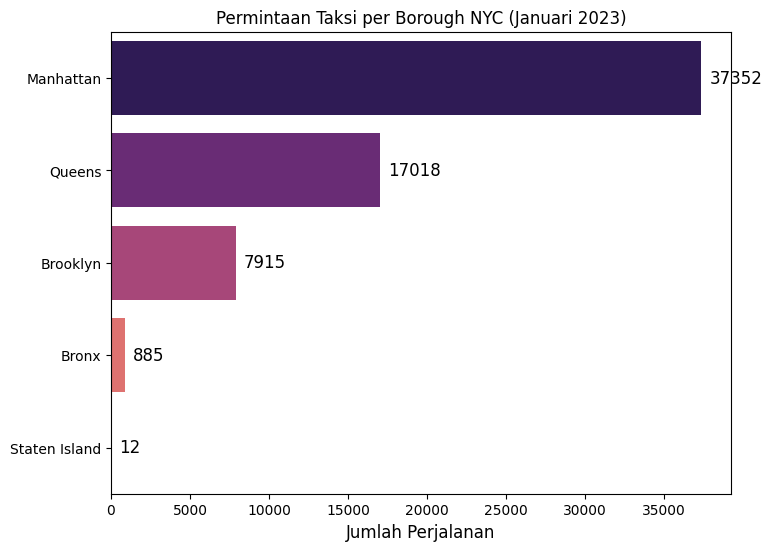

In [96]:
# Menghitung jumlah perjalanan per Borough
top_pickup_Borough = df["Pickup Borough"].value_counts()

# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_pickup_Borough.values, y=top_pickup_Borough.index, hue=top_pickup_Borough.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(top_pickup_Borough.values):
    plt.text(value + 500, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title("Permintaan Taksi per Borough NYC (Januari 2023)", fontsize=12)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

**Borough** adalah divisi administratif utama di New York City. Kota ini dibagi menjadi 5 borough utama, yaitu:
1. Manhattan
1. Brooklyn
1. Queens
1. The Bronx
1. Staten Island

Dari bar chart diatas dapat diketahui bahwa Borough yang memiliki permintaan paling tinggi pada Januari 2023 adalah Manhattan, yang memiliki jumlah permintaan taxi sebanyak 37352, nilai ini setara dengan 59% dari total data perjalanan di dataset ini (63182). Kemudian disusul oleh Queens sebanyak 17018 (27%), Brooklyn 7915 (12%), Bronx 885 (1,4%), dan permintaan yang paling rendah terdapat pada State Island.

In [97]:
top_pickup_zones = df["Pickup Zone"].value_counts()

df_top_zones = (top_pickup_zones.head(5) # <--- ubah jumlah zone yg ingin ditampilkan disini
                .to_frame(name="count")
                .assign(persentase=lambda x: (x["count"] / df.shape[0]) * 100)
                .reset_index())

df_top_zones = df_top_zones.merge(
    df[["Pickup Zone", "Pickup Borough"]].drop_duplicates(),
    on="Pickup Zone", how="left"
)

df_top_zones


,Pickup Zone,count,persentase,Pickup Borough
0,East Harlem North,12921,20.450445,Manhattan
1,East Harlem South,8828,13.972334,Manhattan
2,Forest Hills,3798,6.011206,Queens
3,Central Harlem,3725,5.895666,Manhattan
4,Morningside Heights,3592,5.685163,Manhattan


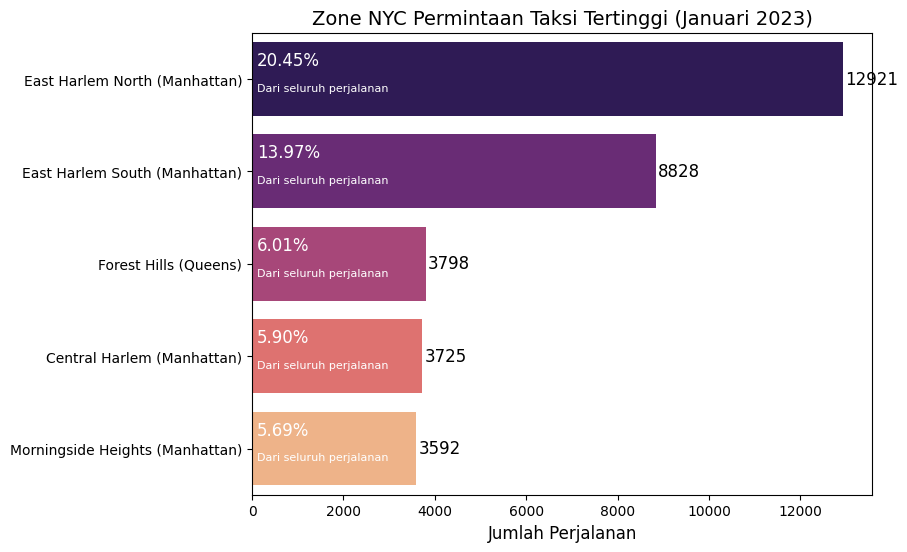

In [98]:
df_top_zones["Zone (Borough)"] = df_top_zones["Pickup Zone"].astype(str) + " (" + df_top_zones["Pickup Borough"] + ")"

# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_top_zones["count"], y=df_top_zones["Zone (Borough)"], hue=df_top_zones["Zone (Borough)"], palette="magma", legend=False)

# Menambahkan label perjalanan
for index, value in enumerate(df_top_zones["count"]):
    plt.text(value + 50, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_top_zones["persentase"]):
    plt.text(100, index-0.2, f"{value:.2f}%", color="white", va="center", fontsize=12)

# Menambahkan label text
for index, value in enumerate(df_top_zones["persentase"]):
    plt.text(100, index+0.1, "Dari seluruh perjalanan", color="white", va="center", fontsize=8)


# Menambahkan judul dan label
plt.title("Zone NYC Permintaan Taksi Tertinggi (Januari 2023)", fontsize=14)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Setelah kita mengetahui perbandingan permintaan taxi berdasarkan Borough kita akan memperkecil lagi wilayahnya, yaitu permintaan taxi berdasarkan Zone. Zone adalah wilayah administratif yang levelnya dibawah Borough. Berdasarkan grafik diatas dapat kita lihat bahwa zone yang paling tinggi permintaan taxi di New York City pada Januari 2023 adalah East Harlem North yang memiliki jumlah perjalanan sebesar 12,921 dan memiliki porsi 20.45% dari 100% permintaan taxi di New York City. Dari sini dapat kita simpulkan juga bahwa zone yang paling tinggi permintaanya kebanyakan berada pada Manhattan dan terdapat satu zone pada posisi 3 yang berada pada Queens yaitu Forest Hills.

## Abnormal Trip Distance

Pada Abnormal Trip Distance kita akan mendeteksi apakah ada perjalanan yang jaraknya nol, yang berarti kendaraan tidak bergerak namun tarifnya ada atau dikenakan

In [99]:
distance_anomaly = df[(df["trip_distance"] == 0) & (df["total_amount"] > 0)]

print("Abnormal Trip Distance Count :",distance_anomaly.shape[0], f"({distance_anomaly.shape[0]/df.shape[0]:.2%})")
distance_anomaly.head()

Abnormal Trip Distance Count : 2722 (4.31%)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds)
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,...,1.0,0.0,Queens,Steinway,Queens,Old Astoria,0 days 00:06:20,0,Sunday,380.0
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,...,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South,0 days 00:03:00,0,Sunday,180.0
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,...,2.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,0 days 00:00:07,1,Sunday,7.0
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,...,1.0,0.0,Queens,Astoria,Queens,Astoria,0 days 00:00:23,1,Sunday,23.0
169,2,2023-01-01 02:50:02,2023-01-01 02:50:27,N,1.0,157,157,1.0,0.0,3.0,...,1.0,0.0,Queens,Maspeth,Queens,Maspeth,0 days 00:00:25,2,Sunday,25.0


In [100]:
df["Distance Anomaly"] = False
df.loc[distance_anomaly.index, "Distance Anomaly"] = True 

Perjalanan dengan jarak nol: Ditemukan **2722  perjalanan** yang mencatatkan jarak 0 mil atau sekitar **4.31%** dari total perjalanan, meskipun terdapat durasi perjalanan. Ini bisa menunjukkan:
* Kesalahan pencatatan pada perangkat GPS.
* Beberapa pengemudi mungkin mencoba memanipulasi sistem dengan mencatat perjalanan palsu untuk meningkatkan jumlah perjalanan atau pendapatan.
* Pengemudi mungkin memulai dan mengakhiri perjalanan tanpa benar-benar membawa penumpang. 
* Sistem mungkin mencatat perjalanan walaupun hanya berupa kesalahan teknis (misalnya perjalanan dicatat secara otomatis tanpa benar-benar terjadi). <br>

oleh karena itu pada perjalanan tersebut kita akan menandainya sebagai perjalanan mencurigakan.

## Abnormal Travel Time

Pada Abnormal Travel Time kita akan mendeteksi perjalanan dengan kriteria:
* Perjalanan terlalu cepat untuk jarak jauh (< 10 detik untuk jarak > 5 mil) 
* Perjalanan terlalu lambat untuk jarak pendek (> 1 jam untuk jarak < 0.5 mil)

Alasan:
* Menempuh jarak lebih dari 5 mil (sekitar 8 km) dalam waktu kurang dari 10 detik memerlukan kecepatan yang sangat tidak realistis (setara lebih dari 1.800 mph / 2.900 km/h — hampir secepat pesawat jet!)
* Jarak kurang dari 0.5 mil (sekitar 800 meter) biasanya bisa ditempuh dalam waktu 5-15 menit bahkan dengan kemacetan berat normalnya tidak lebih dari 1 jam.


In [101]:
# Deteksi anomali durasi perjalanan
time_anomaly =   df[((df['trip_distance'] > 5) & (df['Trip Duration (seconds)'] < 10)) |
                    ((df['trip_distance'] < 0.5) & (df['Trip Duration (seconds)'] > 3600))]

# Tampilkan hasil
print("Abnormal Travel Time Count :",time_anomaly.shape[0], f"({time_anomaly.shape[0]/df.shape[0]:.2%})")
time_anomaly.head()

Abnormal Travel Time Count : 111 (0.18%)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds),Distance Anomaly
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.7,3.0,...,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0 days 00:00:05,0,Sunday,5.0,False
1141,2,2023-01-01 20:28:01,2023-01-02 00:00:00,N,1.0,83,226,1.0,0.0,17.0,...,0.0,Queens,Elmhurst/Maspeth,Queens,Sunnyside,0 days 03:31:59,20,Sunday,12719.0,True
1180,1,2023-01-01 21:14:27,2023-01-01 22:24:48,N,1.0,48,89,1.0,0.0,31.2,...,0.0,Manhattan,Clinton East,Brooklyn,Flatbush/Ditmas Park,0 days 01:10:21,21,Sunday,4221.0,True
1315,2,2023-01-02 02:16:16,2023-01-03 00:00:00,N,5.0,92,92,1.0,0.0,18.0,...,0.0,Queens,Flushing,Queens,Flushing,0 days 21:43:44,2,Monday,78224.0,True
1910,2,2023-01-02 14:33:05,2023-01-02 15:34:00,N,1.0,76,89,1.0,0.0,32.5,...,0.0,Brooklyn,East New York,Brooklyn,Flatbush/Ditmas Park,0 days 01:00:55,14,Monday,3655.0,True


In [102]:
df["Time Travel Anomaly"] = False
df.loc[time_anomaly.index, "Time Travel Anomaly"] = True 

Dari hasil diatas dapat diketahui sebanyak 111  perjalanan atau sekitar 0.18% dari total perjalanan terindikasi Abnormal Travel Time, hal ini dapat menunjukan:
* Kesalahan pencatatan waktu.
* Penipuan sistem untuk memanipulasi catatan perjalanan.
* Lupa mengakhiri perjalanan di aplikasi taksi, sehingga meter taxi terus berjalan
* Beberapa pengemudi bisa saja memanipulasi data perjalanan agar terlihat lebih pendek atau lebih cepat untuk menghindari inspeksi atau untuk keuntungan tertentu.
* Pengemudi dapat dengan sengaja memperpanjang durasi untuk meningkatkan tarif berbasis waktu.

oleh karena itu pada perjalanan tersebut kita akan menandainya sebagai time travel anomaly.

## Abnormal Travel Rate

Ratecode NYC TLC (New York City Taxi & Limousine Commission) adalah sistem kode tarif yang digunakan untuk menentukan jenis tarif yang berlaku dalam perjalanan taksi di New York City. Kode ini membantu dalam menghitung biaya perjalanan berdasarkan zona, jarak, atau ketentuan khusus lainnya.

Berikut adalah daftar kode tarif (Rate Code) yang digunakan oleh taksi di NYC:

|Rate Code	|Deskripsi|
|-|-|
|1 – Standard Rate	|Tarif standar dalam batas kota NYC (5 boroughs).|
|2 – JFK	|Tarif tetap dari/ke Bandara JFK dan Manhattan.|
|3 – Newark	|Perjalanan dari/ke Bandara Newark (EWR).|
|4 – Nassau/Westchester|	Perjalanan keluar dari NYC ke wilayah Nassau atau Westchester.|
|5 – Negotiated Fare	|Tarif yang telah disepakati sebelumnya, biasanya untuk perjalanan tertentu atau layanan khusus.|
|6 – Group Ride	|Tarif khusus untuk layanan berbagi (group ride) pada rute tertentu.|

In [103]:
df["Travel Rate Anomaly"] = False

**Ratecode 1 – Standard Rate**
* Ratecode 1 adalah tarif reguler untuk perjalanan dalam 5 borough NYC.
* Abnormalitas terjadi jika perjalanan menggunakan Ratecode 1 tetapi keluar dari NYC (seharusnya Ratecode 4).
* 3$ adalah tarif awal standar untuk Rate Code 1 ketika argo dimulai, jika ada biaya perjalan <3$ maka mencurigakan 

In [104]:
nyc_boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
wrong_borough_rate1 = df[(df["RatecodeID"] == 1) & 
                        ~(df["Drop Borough"].isin(nyc_boroughs)) & 
                        ~(df["Pickup Borough"].isin(nyc_boroughs))]

print("wrong_borough_rate1 :", wrong_borough_rate1.shape[0],
        "\nBorough :",wrong_borough_rate1["Pickup Borough"].unique(), wrong_borough_rate1["Drop Borough"].unique())

wrong_borough_rate1 : 0 
Borough : [] []


In [105]:
low_fare_per_mile_rate1 = df[(df["RatecodeID"] == 1) & (df["total_amount"] < 3)]

print("Wrong low_fare_per_mile_rate1 Fare:", low_fare_per_mile_rate1.shape[0])
df.loc[low_fare_per_mile_rate1.index, "Travel Rate Anomaly"] = True 

Wrong low_fare_per_mile_rate1 Fare: 212


212 perjalanan memiliki total tarif terlalu rendah <3$
* 3$ adalah tarif awal standar untuk Rate Code 1 ketika argo dimulai, jika ada biaya perjalan <3$ maka mencurigakan 
* Mungkin ada kesalahan dalam pengisian tarif atau perjalanan dilakukan dengan diskon besar.

Ratecode 1 adalah tarif reguler untuk perjalanan dalam 5 borough NYC. Jika ada perlajanan yang menggunakan Ratecode = 1, namun pickup dan drop boroughnya berada diluar wilayah NYC, maka perjalanan tersebut mencurigakan. Namun, pada hasil temuan menurut Borough untuk Rate code 1 yaitu standard rate sudah sesuai kriteria sehingga tidak ditemukan kesalahan pada penjemputan dan tujuan lokasi. Namun, ditemukan 212 perjalanan memiliki total tarif terlalu rendah <3$ yang menyalahi aturan untuk Rate code 1.

**Ratecode 2 – JFK Flat Fare**
* Tarif tetap (flat rate) berlaku hanya untuk perjalanan antara Manhattan dan JFK.
* Jika perjalanan tidak dari/ke JFK tetapi menggunakan Ratecode 2, ini mencurigakan.

In [106]:
wrong_jfk_fare = df[(df["RatecodeID"] == 2) & 
                    (~df["Pickup Zone"].str.contains("JFK", na=False)) & 
                    (~df["Drop Zone"].str.contains("JFK", na=False))]

print("Wrong JFK Fare:", wrong_jfk_fare.shape[0])
df.loc[wrong_jfk_fare.index, "Travel Rate Anomaly"] = True 

Wrong JFK Fare: 53


53 perjalanan menggunakan tarif tetap JFK tetapi tidak berasal atau menuju JFK.
* Seharusnya tarif ini hanya berlaku untuk perjalanan Manhattan <-> JFK.
* Ini bisa mengindikasikan upaya pengemudi untuk mengklaim tarif tetap tanpa rute yang sesuai.

**Ratecode 3 – Newark Airport Fare**
* Tarif khusus berlaku hanya untuk perjalanan dari/ke Bandara Newark.
* Jika perjalanan tidak dari/ke Newark tetapi menggunakan Ratecode 3, ini mencurigakan.

In [107]:
wrong_newark_fare = df[(df["RatecodeID"] == 3) & 
                        (~df["Pickup Zone"].str.contains("Newark", na=False)) & 
                        (~df["Drop Zone"].str.contains("Newark", na=False))]

print("Wrong Newark Fare :" ,wrong_newark_fare.shape[0])
df.loc[wrong_newark_fare.index, "Travel Rate Anomaly"] = True 

Wrong Newark Fare : 17


17 perjalanan menggunakan tarif Newark tetapi tidak berasal atau menuju Newark.
* Bisa jadi pengemudi menerapkan tarif ini secara tidak sah.
* Ini menunjukkan kemungkinan kesalahan input atau manipulasi tarif.

**Ratecode 4 – Nassau/Westchester**
* Tarif ini hanya berlaku jika perjalanan keluar dari NYC (Manhattan, Brooklyn, Queens, Bronx, Staten Island).
* Jika perjalanan masih dalam NYC tetapi menggunakan Ratecode 4, ini mencurigakan.

In [108]:
wrong_nassau_westchester_fare = df[(df["RatecodeID"] == 4) & (df["Drop Borough"].isin(nyc_boroughs))]

print("Wrong Nassau/Westchester Fare :", wrong_nassau_westchester_fare.shape[0])
df.loc[wrong_nassau_westchester_fare.index, "Travel Rate Anomaly"] = True 

Wrong Nassau/Westchester Fare : 2


2 perjalanan menggunakan tarif Nassau/Westchester tetapi masih dalam NYC.
* Ini bisa menunjukkan kesalahan input atau upaya pengemudi menaikkan tarif secara tidak sah.

**Ratecode 5 – Negotiated Fare** 
* Harus ada kesepakatan tarif sebelum perjalanan dimulai.
* Tarif ini tidak mengikuti tarif meter standar.
* Penumpang disarankan untuk memastikan tarif yang disepakati sudah jelas untuk menghindari

dikarenakan tidak ada data tentang kesepakatan antara penumpang dan pengemudi pada dataset ini maka kita asumsikan, **Jika tarif terlalu rendah (< $1) tergolong mencurigakan**.

In [109]:
wrong_negotiated_fare = df[(df["RatecodeID"] == 5) & (df["fare_amount"] < 1)]

print("Wrong Negotiated Fare :", wrong_negotiated_fare.shape[0])
df.loc[wrong_negotiated_fare.index, "Travel Rate Anomaly"] = True 

Wrong Negotiated Fare : 33


33 perjalanan memiliki tarif terlalu rendah (< $1).
* Bisa jadi ada negosiasi tidak wajar atau manipulasi tarif.
* Ini bisa menunjukkan upaya pengemudi untuk menghindari pelaporan tarif penuh.

**Ratecode 6 – Group Ride**
* Digunakan ketika penumpang berbagi taksi dengan orang lain yang memiliki tujuan yang sama atau searah.
* Layanan berbagi taksi di titik tertentu, misalnya dari pusat transportasi utama ke area populer.
* Tarif bisa lebih murah karena biaya dibagi di antara penumpang, Jika ada hanya 1 penumpang, maka mencurigakan.

In [110]:
wrong_group_ride = df[(df["RatecodeID"] == 6) & (df["passenger_count"] == 1)]

print("Wrong Group Ride :", wrong_group_ride.shape[0])

Wrong Group Ride : 0


Tidak ditemukan abnormalitas dalam perjalanan grup (Ratecode 6).
* Semua perjalanan berbagi memiliki lebih dari satu penumpang.
* Ini menunjukkan sistem tarif berjalan dengan benar untuk Ratecode 6.

## Top Locations with Abnormal Trips

Setelah kita mengetahui perjalanan mana saja yang mencurigakan (abnormal) dan kemungkinan sebagai fraud, kita akan mencari lokasi yang frekuensi perjalanan mencurigakannya tinggi. Namun, sebelum itu kita akan membuat tanda perjalanan yang mencurigakan terlebih dahulu dari ketiga kategori abnormal (Travel distance, Travel time, Travel rate) di setiap perjalanan dengan kolom baru yaitu `Anomaly Travel`.

In [111]:
df["Anomaly Travel"] = df[["Distance Anomaly", "Time Travel Anomaly", "Travel Rate Anomaly"]].any(axis=1).astype(int)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds),Distance Anomaly,Time Travel Anomaly,Travel Rate Anomaly,Anomaly Travel
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Manhattan,Lincoln Square West,0 days 00:11:01,0,Sunday,661.0,False,False,False,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Manhattan,Central Park,0 days 00:06:46,0,Sunday,406.0,False,False,False,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,Queens,Old Astoria,0 days 00:06:20,0,Sunday,380.0,True,False,False,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Manhattan,Upper West Side North,0 days 00:05:49,0,Sunday,349.0,False,False,False,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Manhattan,East Harlem North,0 days 00:05:58,0,Sunday,358.0,False,False,False,0


In [112]:
df_total_trips = top_pickup_Borough.reset_index()
df_total_trips.columns = ["Borough", "Total Trips"]
df_total_trips

,Borough,Total Trips
0,Manhattan,37352
1,Queens,17018
2,Brooklyn,7915
3,Bronx,885
4,Staten Island,12


In [113]:
anomaly_borough = df.groupby("Pickup Borough")["Anomaly Travel"].sum().sort_values(ascending=False)
df_top_abnormal_borough = pd.DataFrame({
                                        "Borough": anomaly_borough.index,
                                        "Anomaly Count": anomaly_borough.values,
                                        })
df_top_abnormal_borough

,Borough,Anomaly Count
0,Queens,1218
1,Brooklyn,768
2,Manhattan,711
3,Bronx,321
4,Staten Island,4


In [114]:
df_top_abnormal_borough = df_top_abnormal_borough.merge(df_total_trips, on="Borough", how="left")
df_top_abnormal_borough["Anomaly Rate (%)"] = ((df_top_abnormal_borough["Anomaly Count"] / df_top_abnormal_borough["Total Trips"]) * 100).round(2)
df_top_abnormal_borough

,Borough,Anomaly Count,Total Trips,Anomaly Rate (%)
0,Queens,1218,17018,7.16
1,Brooklyn,768,7915,9.70
2,Manhattan,711,37352,1.90
3,Bronx,321,885,36.27
4,Staten Island,4,12,33.33


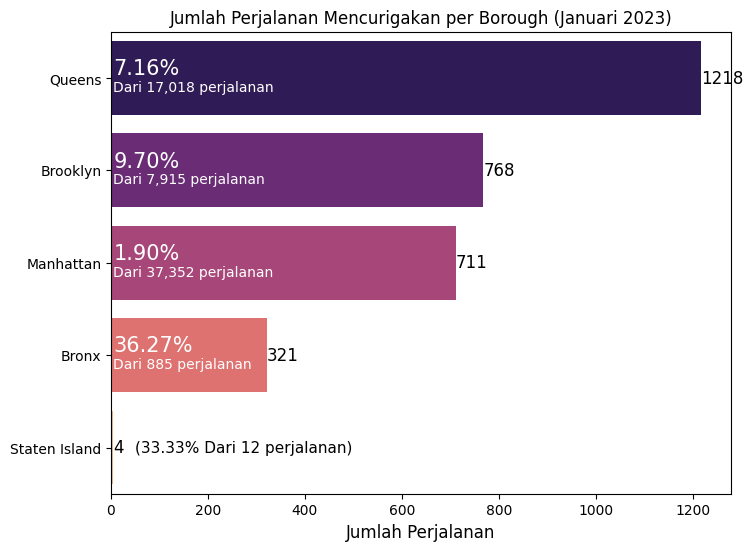

In [115]:
# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_top_abnormal_borough["Anomaly Count"], y=df_top_abnormal_borough["Borough"], 
                hue=df_top_abnormal_borough["Borough"], palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(df_top_abnormal_borough["Anomaly Count"]):
    plt.text(value, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_top_abnormal_borough["Anomaly Rate (%)"]):
    if index < 4:
        plt.text(5, index-0.1, f"{value:.2f}%", color="white", va="center", fontsize=15)

plt.text(50, 4, f"({df_top_abnormal_borough.loc[4,"Anomaly Rate (%)"]:.2f}% Dari {df_top_abnormal_borough.loc[4,"Total Trips"]} perjalanan)", 
        color="black", va="center", fontsize=11)

# Menambahkan label text
for index, value in enumerate(df_top_abnormal_borough["Total Trips"]):
    if index < 4:
        plt.text(5, index+0.1, f"Dari {value:,} perjalanan", color="white", va="center", fontsize=10)


# Menambahkan judul dan label
plt.title("Jumlah Perjalanan Mencurigakan per Borough (Januari 2023)", fontsize=12)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Dari grafik tersebut, berikut adalah beberapa insight yang dapat diambil terkait jumlah perjalanan mencurigakan per borough dalam rentang waktu Januari 2023:

**1. Queens**
* Queens mencatat jumlah perjalanan mencurigakan tertinggi secara absolut, yaitu sebanyak 1.218 perjalanan. Namun, jika dibandingkan dengan total perjalanan sebanyak 17.018, persentasenya hanya 7.16%. Ini menandakan bahwa meskipun volumenya besar, tingkat kecurigaan relatif rendah, menunjukkan efisiensi atau keamanan yang cukup baik dalam konteks volume perjalanan yang tinggi.

**2. Brooklyn**
* Brooklyn menunjukkan angka 768 perjalanan mencurigakan dari total 7.915 perjalanan, menghasilkan persentase tertinggi kedua sebesar 9.70%. Dengan proporsi ini, Brooklyn menonjol sebagai borough dengan aktivitas yang patut diawasi, mengingat hampir satu dari sepuluh perjalanan terindikasi mencurigakan.

**3. Manhattan**
* Meskipun Manhattan menjadi borough dengan total perjalanan tertinggi (37.352 perjalanan), hanya 1.90% dari perjalanan tersebut yang mencurigakan (sebanyak 711 kasus). Ini menjadikan Manhattan sebagai borough dengan tingkat kecurigaan paling rendah secara proporsional, menunjukkan sistem pengawasan yang efektif atau profil perjalanan yang lebih stabil.

**4. Bronx**
* Bronx mencatatkan angka yang sangat menonjol dengan 321 perjalanan mencurigakan dari hanya 885 total perjalanan, menghasilkan persentase tertinggi yaitu 36.27%. Ini merupakan sinyal kuat adanya aktivitas abnormal yang serius, dan perlu dilakukan investigasi lebih dalam untuk mengidentifikasi faktor-faktor risiko yang mendasarinya.
    
**5. Staten Island**
* Meskipun Staten Island hanya memiliki 12 perjalanan selama periode tersebut, sebanyak 4 di antaranya (33.33%) terindikasi mencurigakan. Meskipun jumlah absolutnya kecil, persentasenya sangat tinggi, sehingga borough ini tetap perlu mendapatkan perhatian, terlebih karena angka yang tinggi bisa disebabkan oleh anomali data atau pola khusus yang unik.

In [116]:
# Hitung total perjalanan mencurigakan per zona
anomaly_zone = df.groupby("Pickup Zone")["Anomaly Travel"].sum()

# Buat DataFrame top zona berdasarkan total perjalanan
df_top_abnormal_zones = top_pickup_zones.reset_index()
df_top_abnormal_zones.columns = ["Zone", "Total Trips"]

# Gabungkan dengan data anomali
df_top_abnormal_zones = df_top_abnormal_zones.merge(
    anomaly_zone.rename("Anomaly Travel"), left_on="Zone", right_index=True, how="left"
)

# Hitung persentase anomali
df_top_abnormal_zones["Anomaly Rate (%)"] = (
    df_top_abnormal_zones["Anomaly Travel"] / df_top_abnormal_zones["Total Trips"] * 100
).round(2)

# Tambahkan info borough
zone_borough = df[["Pickup Zone", "Pickup Borough"]].drop_duplicates()
df_top_abnormal_zones = df_top_abnormal_zones.merge(
    zone_borough, left_on="Zone", right_on="Pickup Zone", how="left"
)

# Buat kolom gabungan zona + borough
df_top_abnormal_zones["Zone (Borough)"] = df_top_abnormal_zones["Zone"] + " (" + df_top_abnormal_zones["Pickup Borough"] + ")"
df_top_abnormal_zones.head()


,Zone,Total Trips,Anomaly Travel,Anomaly Rate (%),Pickup Zone,Pickup Borough,Zone (Borough)
0,East Harlem North,12921,223,1.73,East Harlem North,Manhattan,East Harlem North (Manhattan)
1,East Harlem South,8828,170,1.93,East Harlem South,Manhattan,East Harlem South (Manhattan)
2,Forest Hills,3798,127,3.34,Forest Hills,Queens,Forest Hills (Queens)
3,Central Harlem,3725,84,2.26,Central Harlem,Manhattan,Central Harlem (Manhattan)
4,Morningside Heights,3592,25,0.70,Morningside Heights,Manhattan,Morningside Heights (Manhattan)


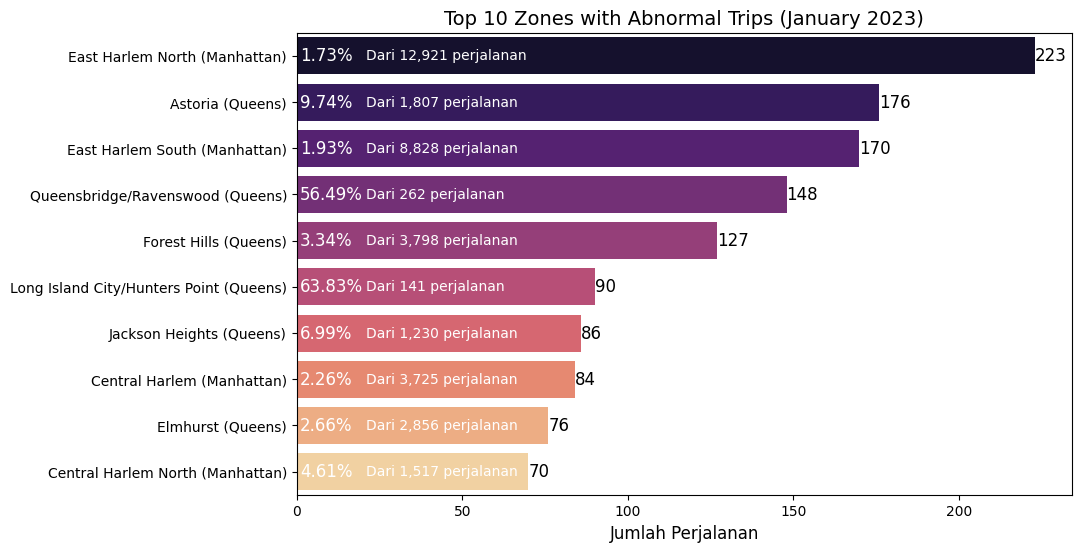

In [117]:
# Ambil 10 zona teratas berdasarkan jumlah perjalanan mencurigakan
top_n_abnormal_zones= df_top_abnormal_zones.nlargest(10, "Anomaly Travel")

# Membuat visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_n_abnormal_zones["Anomaly Travel"], y=top_n_abnormal_zones["Zone (Borough)"], hue=top_n_abnormal_zones["Zone (Borough)"], palette="magma", legend=False)

# Menambahkan label perjalanan
for index, value in enumerate(top_n_abnormal_zones["Anomaly Travel"]):
    plt.text(value, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(top_n_abnormal_zones["Anomaly Rate (%)"]):
    plt.text(1, index, f"{value:.2f}%", color="white", va="center", fontsize=12)

# Menambahkan label text
for index, value in enumerate(top_n_abnormal_zones["Total Trips"]):
    plt.text(21, index, f"Dari {value:,} perjalanan", color="white", va="center", fontsize=10)

# Menambahkan judul dan label
plt.title(f"Top {len(top_n_abnormal_zones)} Zones with Abnormal Trips (January 2023)", fontsize=14)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

**1. Zona dengan Jumlah Perjalanan Mencurigakan Tinggi tapi Rasio Rendah**
* East Harlem North dan East Harlem South di Manhattan mencatat jumlah perjalanan mencurigakan tertinggi secara absolut (223 dan 170 perjalanan). Namun, karena jumlah total perjalanannya sangat besar (hingga lebih dari 12.000), rasio perjalanan mencurigakan mereka tetap rendah (sekitar 1.7–1.9%). Hal ini menandakan bahwa tingginya jumlah perjalanan mencurigakan lebih disebabkan oleh padatnya aktivitas, bukan karena frekuensi penyimpangan yang tinggi.

**2. Zona dengan Perjalanan Mencurigakan Menengah namun Signifikan**
* Zona seperti Astoria (9.74%) dan Jackson Heights (6.99%) juga memperlihatkan kecenderungan perjalanan mencurigakan yang cukup tinggi. Dengan volume perjalanan lebih dari 1.200–1.800, rasio tersebut menunjukkan adanya potensi penyimpangan yang tidak bisa diabaikan. Hal serupa juga terlihat di Central Harlem North (4.61%) yang menjadi zona Manhattan dengan rasio perjalanan mencurigakan tertinggi dalam daftar ini.

**3. Zona dengan Rasio Perjalanan Mencurigakan Sangat Tinggi**
* Beberapa zona di Queens menunjukkan rasio abnormalitas yang sangat mencolok. Long Island City/Hunters Point mencatat 63.83% perjalanan mencurigakan dari total 141 perjalanan, sementara Queensbridge/Ravenswood mencapai 56.49% dari hanya 262 perjalanan. Meski total perjalanannya relatif rendah, proporsi abnormalitas yang sangat tinggi membuat kedua zona ini menjadi perhatian utama.



## Abnormality Travel Time Pattern 

Setelah kita mengetahui zona mana yang menjadi daerah yang sering terjadinya perjalanan mencurigakan, selanjutnya kita akan menganalisis pola frekuensi terjadinya perjalanan mencurigakan terseut berdasarkan jam dan hari.

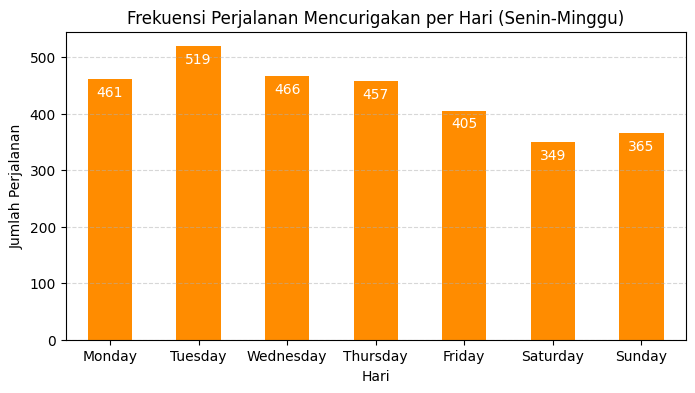

In [118]:
daily_anomalies_weekday = df.groupby("day_of_week")["Anomaly Travel"].sum()

# Urutkan sesuai urutan hari dalam seminggu
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_anomalies_weekday = daily_anomalies_weekday.reindex(order)

# Grafik per hari (Senin-Minggu) dengan label horizontal
plt.figure(figsize=(8, 4))
bars = daily_anomalies_weekday.plot(kind='bar', color='darkorange')
plt.title('Frekuensi Perjalanan Mencurigakan per Hari (Senin-Minggu)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)  # Label horizontal

# Tambahkan label pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posisi X (tengah batang)
            bar.get_height() - 30,               # Posisi Y (sedikit di atas batang)
            int(bar.get_height()),               # Nilai label
            ha='center',color="white"  )         # Rata tengah
    
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**1. Puncak Perjalanan Mencurigakan Terjadi pada Awal Pekan**
* Perjalanan Mencurigakan paling banyak terjadi pada hari Selasa (519), diikuti oleh Rabu (466) dan Senin (461). Hal ini menunjukkan bahwa awal minggu merupakan periode paling rawan terjadinya perjalanan mencurigakan. Mungkin karena meningkatnya aktivitas operasional setelah akhir pekan, sehingga lebih besar kemungkinan terjadi penyimpangan. 

**2. Penurunan Bertahap Menjelang Akhir Pekan**
* Frekuensi abbrmalitas cenderung menurun mulai hari Kamis (457) hingga Jumat (405), menunjukkan penurunan stabil seiring mendekati akhir pekan. Ini mungkin mencerminkan berkurangnya volume perjalanan atau tingkat pengawasan yang berubah saat menjelang akhir pekan. 

**3. Akhir Pekan Lebih Aman, tapi Tetap Perlu Diperhatikan**
* Hari Sabtu (349) dan Minggu (365) mencatat jumlah perjalanan mencurigakan paling rendah. Meskipun lebih sedikit dibanding hari kerja, angka ini tetap signifikan dan menunjukkan bahwa potensi penyimpangan tetap ada bahkan di hari libur.

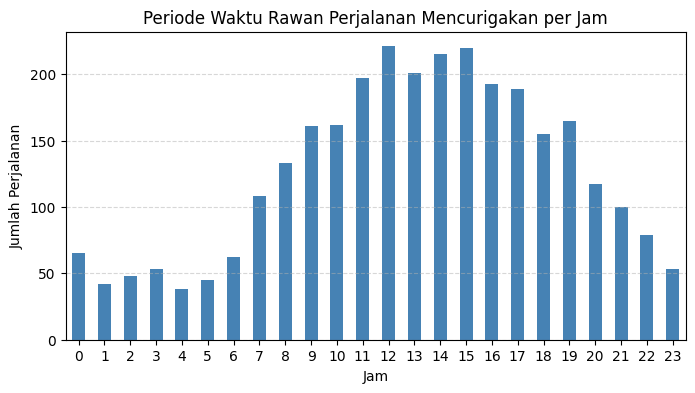

In [119]:
hourly_anomalies = df.groupby("hour")["Anomaly Travel"].sum()

# Grafik per jam dengan label horizontal
plt.figure(figsize=(8, 4))
hourly_anomalies.plot(kind='bar', color='steelblue')
plt.title('Periode Waktu Rawan Perjalanan Mencurigakan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)  # Label horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**1. Pola Waktu dengan Tingkat Perjalanan Abnormal Tertinggi**
*  Puncak Tertinggi (11:00 - 15:00):
    * Abnormalitas mencapai titik tertinggi pada periode ini. Ini bisa disebabkan oleh:
        - Aktivitas siang hari yang padat seperti jam makan siang atau perjalanan bisnis.
        - Volume kendaraan yang meningkat, khususnya kendaraan logistik dan layanan antar.

    * Penurunan Setelah Jam 15:00:
        - Setelah pukul 15:00, frekuensi abnormalitas mulai menurun, kemungkinan karena perjalanan mulai stabil saat transisi dari jam sibuk siang ke sore.

**2. Pola Waktu dengan Abnormalitas Rendah**
* Dini Hari (00:00 - 06:00):
    * Abnormalitas relatif rendah, namun tidak nol. Ini bisa dikaitkan dengan:
        - Aktivitas malam seperti layanan taksi untuk pelanggan klub malam atau pekerja shift malam.
        - Potensi risiko dari pengemudi yang mengantuk atau kecepatan berlebih saat jalanan sepi.

**3. Pola Kritis (Pagi dan Sore)**
* Pagi (06:00 - 09:00): Lonjakan perjalanan mencurigakan, menandakan periode jam sibuk saat orang berangkat kerja atau sekolah.
* Sore (16:00 - 18:00): Penurunan bertahap setelah puncak siang, mencerminkan arus perjalanan pulang kantor.

## Comparison of the Number of Abnormal Trips between Weekdays and Weekends

Analisis ini bertujuan untuk menguji apakah terdapat perbedaan signifikan dalam jumlah perjalanan taksi yang mencurigakan antara hari kerja (Senin–Jumat) dan akhir pekan (Sabtu–Minggu) di New York City. Dengan hipotesis sebagai:
* **Hipotesis Nol (H0)**: Tidak ada perbedaan signifikan dalam jumlah perjalanan mencurigakan antara hari kerja dan akhir pekan.
* **Hipotesis Alternatif (H1)**: Ada perbedaan signifikan dalam jumlah perjalanan mencurigakan antara hari kerja dan akhir pekan.

Kita akan membaca dataset dan mengelompokkan data ke dalam dua kategori:
1. Hari kerja (Weekday): Senin – Jumat
1. Akhir pekan (Weekend): Sabtu – Minggu

In [120]:
# Menentukan hari kerja dan akhir pekan
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekend = ["Saturday", "Sunday"]

# Menambahkan kolom kategori hari (Weekday vs Weekend)
df["Day Category"] = df["day_of_week"].apply(lambda x: "Weekday" if x in weekday else "Weekend")

# Menghitung jumlah anomali untuk hari kerja dan akhir pekan
weekday_anomalies = df[df["Day Category"] == "Weekday"].groupby("day_of_week")["Anomaly Travel"].sum()
weekend_anomalies = df[df["Day Category"] == "Weekend"].groupby("day_of_week")["Anomaly Travel"].sum()

# Menampilkan jumlah anomali berdasarkan kategori
print(f"""Hasil perhitungan data:
- Hari kerja: {weekday_anomalies.sum()} perjalanan mencurigakan
- Akhir pekan: {weekend_anomalies.sum()} perjalanan mencurigakan

Dari sini terlihat bahwa jumlah perjalanan yang mencurigakan lebih tinggi pada hari kerja, \nTetapi kita perlu melakukan uji statistik untuk memastikan apakah perbedaan ini signifikan.""")

Hasil perhitungan data:
- Hari kerja: 2308 perjalanan mencurigakan
- Akhir pekan: 714 perjalanan mencurigakan

Dari sini terlihat bahwa jumlah perjalanan yang mencurigakan lebih tinggi pada hari kerja, 
Tetapi kita perlu melakukan uji statistik untuk memastikan apakah perbedaan ini signifikan.


**Uji Normalitas Data** <br>
Sebelum memilih metode uji statistik yang tepat, kita harus menentukan apakah data berdistribusi normal atau tidak. <br>

Metode yang Digunakan: <br>
* Kolmogorov-Smirnov (KS Test) → Menguji apakah data mengikuti distribusi normal. Uji normalitas lain seperti Shapiro-Wilk memerlukan minimal 3 sampel, sehingga tidak bisa diterapkan pada data akhir pekan.

Ketika kita melakukan Kolmogorov-Smirnov (KS Test) untuk uji normalitas, kita membandingkan distribusi data sampel dengan distribusi normal standar (mean = 0, standar deviasi = 1).
Namun, data kita memiliki skala asli yang bisa memiliki mean dan standar deviasi yang berbeda. Oleh karena itu, standarisasi diperlukan agar data berada dalam bentuk yang dapat dibandingkan langsung dengan distribusi normal standar.

**Alasan Standarisasi dalam KS Test** <br>
1. KS Test membandingkan dengan distribusi normal standar
    * KS Test secara default membandingkan data dengan distribusi normal standar (mean=0, std=1).
    * Jika data asli memiliki skala yang berbeda, maka hasil KS Test bisa menjadi bias.
1. Menghilangkan efek skala data asli
    * Jika dataset memiliki mean dan standar deviasi yang jauh berbeda dari distribusi normal standar, hasil KS Test bisa salah menolak atau gagal menolak normalitas.
1. Memastikan perbandingan yang adil
    * Dengan menstandarisasi data, kita dapat memastikan bahwa kita benar-benar menguji bentuk distribusi (bukan skala data).

In [121]:
# Standarisasi data untuk Uji Kolmogorov-Smirnov
# Tanpa standarisasi, hasil KS Test bisa tidak akurat karena pengaruh skala data asli.
weekday_standardized = (weekday_anomalies - weekday_anomalies.mean()) / weekday_anomalies.std()
weekend_standardized = (weekend_anomalies - weekend_anomalies.mean()) / weekend_anomalies.std()

# Uji Kolmogorov-Smirnov
ks_weekday_stat, ks_weekday_pval = stats.kstest(weekday_standardized, 'norm')
ks_weekend_stat, ks_weekend_pval = stats.kstest(weekend_standardized, 'norm')

# Menampilkan hasil
if ks_weekday_pval > 0.05:
    print(f"Hari Kerja (Weekday): {ks_weekday_pval} (> 0.05) → Data berdistribusi normal")
else:
    print(f"Hari Kerja (Weekday): {ks_weekday_pval} (<= 0.05) → Data tidak berdistribusi normal")

if ks_weekend_pval > 0.05:
    print(f"Akhir Pekan (Weekend): {ks_weekend_pval} (> 0.05) → Data berdistribusi normal")
else:
    print(f"Akhir Pekan (Weekend): {ks_weekend_pval} (<= 0.05) → Data tidak berdistribusi normal")

Hari Kerja (Weekday): 0.8233617468309172 (> 0.05) → Data berdistribusi normal
Akhir Pekan (Weekend): 0.9991595100193004 (> 0.05) → Data berdistribusi normal


Setelah kita mengetahui bahwa data abnormalitas perjalanan pada hari kerja dan akhir pekan berdistribusi normal (berdasarkan Uji Kolmogorov-Smirnov), langkah selanjutnya adalah memilih uji statistik yang tepat. Hari kerja dan akhir pekan dianggap sebagai dua kelompok yang tidak berhubungan (independen) karena tidak ada hubungan langsung antar data dalam masing-masing kelompok.
* Kelompok 1: Jumlah perjalanan mencurigakan pada hari kerja (Senin – Jumat)
* Kelompok 2: Jumlah perjalanan mencurigakan pada akhir pekan (Sabtu – Minggu)

**Pengujian Homogenitas Varians (Levene’s Test)** <br>
Sebelum menjalankan Uji-T, kita perlu mengecek apakah kedua kelompok memiliki varians yang sama (homogenitas varians) menggunakan Levene’s Test.

In [122]:
# Uji Levene untuk memeriksa homogenitas varians
levene_stat, p_value_levene = levene(weekday_anomalies, weekend_anomalies)

# Menampilkan hasil
levene_stat, p_value_levene

if p_value_levene > 0.05:
    print(f"Varians homogen: {p_value_levene} (> 0.05) → Gunakan Uji-T dengan asumsi varians sama (equal variance assumed).")
else:
    print(f"Varians tidak homogen: {p_value_levene} (<= 0.05) → Gunakan Uji-T Welch (equal variance not assumed).")


Varians homogen: 0.48796863539559043 (> 0.05) → Gunakan Uji-T dengan asumsi varians sama (equal variance assumed).


In [123]:
# Melakukan Uji-T Dua Sampel Independen (Welch jika varians tidak homogen)
t_stat, p_value_ttest = ttest_ind(weekday_anomalies, weekend_anomalies, equal_var=True)

# Menampilkan hasil
if p_value_ttest < 0.05:
    print(f"kita menolak H0 : {p_value_ttest} (< 0.05) → Terdapat perbedaan signifikan dalam rata-rata jumlah perjalanan mencurigakan antara hari kerja dan akhir pekan.")
else:
    print(f"Gagal menolak H0: {p_value_ttest} (>= 0.05) → Tidak ada perbedaan rata-rata jumlah perjalanan mencurigakan antara hari kerja dan akhir pekan.")


kita menolak H0 : 0.018762892418491096 (< 0.05) → Terdapat perbedaan signifikan dalam rata-rata jumlah perjalanan mencurigakan antara hari kerja dan akhir pekan.


Insight :
1. Berdasarkan hasil uji statistik, diperoleh nilai p-value sebesar 0.0188, yang lebih kecil dari batas signifikansi 0.05.
Hal ini berarti hipotesis nol (H0) ditolak, sehingga dapat disimpulkan bahwa terdapat perbedaan yang signifikan secara statistik dalam rata-rata jumlah perjalanan mencurigakan antara hari kerja (weekdays) dan akhir pekan (weekends).

2. Temuan ini menunjukkan bahwa pola kemunculan perjalanan mencurigakan tidak bersifat acak atau merata sepanjang minggu.
Dengan kata lain, terdapat kecenderungan waktu tertentu yang lebih sering terjadi perilaku tidak wajar dalam perjalanan taksi, baik dari segi tarif, durasi, maupun jarak tempuh.

3. Perbedaan signifikan ini menjadi sinyal penting bagi pengelola layanan (seperti NYC TLC) untuk melakukan pemantauan dan analisis lebih lanjut terhadap waktu-waktu yang tergolong rawan.
Dengan fokus pada periode dengan tingkat perjalanan mencurigakan tertinggi, upaya pencegahan kecurangan dapat dilakukan secara lebih efektif, serta dapat membantu meningkatkan transparansi dan kepercayaan dalam layanan transportasi.

# Summary

**1. Permintaan Taksi**
* Manhattan menjadi pusat aktivitas taksi tertinggi dengan 37.352 perjalanan, jauh melampaui borough lainnya. Hal ini wajar karena Manhattan adalah pusat bisnis, pariwisata, dan hiburan di NYC. Aktivitas tinggi ini juga didorong oleh keberadaan destinasi populer seperti Times Square, Wall Street, dan berbagai pusat perkantoran.
* Queens menempati posisi kedua dengan 17.018 perjalanan, yang kemungkinan besar dipengaruhi oleh kedekatannya dengan dua bandara utama, yakni JFK dan LaGuardia. Ini menandakan Queens sebagai wilayah transit utama bagi pendatang dan pelancong.
* Brooklyn memiliki 7.915 perjalanan, mencerminkan aktivitas yang cukup stabil, meski tidak setinggi Manhattan atau Queens.
* Bronx dan Staten Island memiliki volume perjalanan yang sangat rendah (885 dan hanya 12 perjalanan), mengindikasikan bahwa kedua borough ini memiliki tingkat penggunaan taksi yang sangat minim selama Januari 2023. Hal ini bisa disebabkan oleh preferensi moda transportasi lain, keterbatasan akses layanan, atau karakteristik wilayah yang berbeda.

**2. Lokasi dengan jumlah perjalanan mencurigakan Tinggi**
* Berdasarkan analisis per borough, Bronx dan Staten Island menunjukkan tingkat perjalanan mencurigakan tertinggi secara proporsional (masing-masing 36.27% dan 33.33%), meskipun jumlah perjalanan mencurigakannya rendah, sehingga perlu perhatian khusus. Brooklyn juga memiliki rasio yang cukup tinggi (9.70%) dibanding borough lain. Sebaliknya, Manhattan memiliki rasio terendah (1.90%) meskipun jumlah perjalanan mencurigakannya terbesar, menandakan potensi efektivitas sistem pengawasan. Sementara itu, Queens mencatat jumlah kasus terbanyak, namun dengan rasio yang relatif rendah (7.16%).
* Beberapa zona di Queens seperti Long Island City/Hunters Point (63.83%) dan Queensbridge/Ravenswood (56.49%) memiliki proporsi perjalanan mencurigakan yang sangat tinggi. Meski total perjalanan rendah, angka ini menjadi sinyal peringatan kuat akan potensi kecurangan yang terlokalisasi.

**3. Polanya Berdasarkan Waktu**
* Awal Pekan dan Tengah Hari Jadi Periode Paling Rawan
    * Perjalanan mencurigakan paling banyak terjadi pada hari kerja, khususnya Selasa, Rabu, dan Senin, dengan jumlah tertinggi tercatat pada rentang waktu 11:00–15:00. Ini menunjukkan bahwa awal minggu dan tengah hari adalah periode dengan risiko kecurangan tertinggi, kemungkinan karena tingginya aktivitas operasional dan volume perjalanan.

* Akhir Pekan Lebih Stabil tapi Bukan Bebas Risiko
    * Sabtu dan Minggu mencatat frekuensi perjalanan mencurigakan paling rendah, namun tetap signifikan. Hal ini menandakan bahwa meskipun volume perjalanan lebih rendah, potensi penyimpangan masih ada dan tidak boleh diabaikan.

* Waktu-waktu Kritis di Pagi dan Sore Hari
    * Selain puncak di tengah hari, terdapat lonjakan mencurigakan pada jam sibuk pagi (06:00–09:00), serta stabilisasi kembali pada sore hari (16:00–18:00), mencerminkan dinamika lalu lintas perkotaan dan perubahan intensitas pengawasan.

# Recommendation

**1. Optimasi Layanan Berdasarkan Permintaan Taksi**
* **Penambahan Armada di Manhattan Selama Jam Sibuk:** <br>
Dengan dominasi perjalanan di Manhattan (37.352 perjalanan), disarankan untuk menambah armada taksi di zona sibuk seperti Times Square dan Wall Street, terutama pada rentang waktu 11:00–15:00, guna memenuhi lonjakan permintaan secara efisien.
* **Perkuat Infrastruktur Layanan di Queens** <br>
Queens sebagai hub bandara memerlukan kerja sama strategis dengan JFK dan LaGuardia. Penyediaan jalur prioritas dan pos taksi di titik kedatangan penting akan meningkatkan kenyamanan serta mengurangi waktu tunggu penumpang.
* **Dorongan Permintaan di Brooklyn & Area Rendah Aktivitas** <br>
Untuk meningkatkan permintaan di Brooklyn dan area dengan aktivitas lebih rendah, mungkin dapat mengadakan penawaran diskon, layanan Untuk meningkatkan utilisasi taksi di Brooklyn dan borough seperti Bronx/Staten Island, perlu program promosi dinamis (misalnya: diskon, rute flat fare, atau layanan antar-jemput terjadwal). Fokuskan pada lokasi wisata lokal dan area pemukiman padat.

**2. Mitigasi Aktivitas Mencurigakan**
* **Penguatan Peran sebagai Regulator Data** <br>
Sebagai regulator, NYC TLC perlu memperkuat perannya dalam memastikan kualitas data dengan membentuk unit pengawasan data internal, menerapkan kebijakan data governance yang ketat, dan membangun sistem deteksi fraud untuk mengidentifikasi perjalanan mencurigakan secara akurat dan memastikan data yang dikumpulkan lebih valid.
* **Peningkatan Akurasi Data & Deteksi Dini Manipulasi** <br>
Bronx dan Staten Island meski volumenya rendah, memiliki rasio mencurigakan tinggi. Untuk itu:
    - Pembaruan sistem taximeter dan perangkat GPS wajib dilakukan secara berkala.
    - Memperbarui Perangkat Lunak GPS untuk meningkatkan akurasi dan mendeteksi lokasi yang tidak realistis atau perjalanan yang tidak sesuai pola wajar.
* **Fokus Pengawasan pada Zona dengan Proporsi Tinggi** <br>
Zona seperti Long Island City/Hunters Point dan Queensbridge/Ravenswood menunjukkan proporsi kecurigaan ekstrem (>50%). Disarankan:
    - Memasang CCTV dan Sensor Pemantauan di area dengan lonjakan perjalanan mencurigakan.
    - Membentuk Tim Inspeksi Lapangan untuk mengecek potensi manipulasi data oleh pengemudi.

**3. Edukasi**
* **Sosialisasi kepada Pengemudi tentang Kebijakan dan Etika** <br>
Program ini bertujuan untuk meningkatkan kesadaran pengemudi akan konsekuensi hukum manipulasi data serta pentingnya kejujuran dalam pencatatan perjalanan.
* **Pemberdayaan Penumpang dalam Pelaporan** <br>
Kampanyekan sistem pelaporan kecurangan berbasis aplikasi atau hotline agar penumpang merasa diberdayakan dan dilibatkan dalam menjaga integritas layanan.

In [ ]:
# Save clean data to csv
# df.to_csv("../data/Clean NYC TLC.csv", index=False)

In [125]:
df["Pickup Zone"].nunique()

217